In [1]:
import os
os.chdir('../..')
os.getcwd()

'C:\\Users\\fim19\\MY_FILES\\studying\\MIPT\\masters_paper\\work_with_data\\code'

In [2]:
import numpy as np
from nilmtk import STATS_CACHE

from utils.constants import DatasetType, DAY_IN_SEC
from utils.data_reading import process_data, read_processed_data, convert_to_nilmtk_format
from utils.preprocessing import generate_sync_signals, get_stable_periods, \
    interpolate_missed_data, generate_async_signals, reformat_to_accumulated
from utils.timing import time_measure

STATS_CACHE.store.close()

In [30]:
ideal = read_processed_data(DatasetType.IDEAL)

data0 = next(iter(ideal.values()))

[reading processed IDEAL dataset] finished in 1m 4.69s
[getting stable periods] finished in 0m 41.58s
[interpolation] finished in 0m 0.03s
[reformatting to accumulated] finished in 0m 0.01s
[generating sync signals] finished in 0m 0.00s
[generating async signals] finished in 0m 0.01s


In [68]:
periods = get_stable_periods(data0, duration=DAY_IN_SEC*30, max_gap=300)
stable_period = data0.iloc[periods[0]]

interpolated = interpolate_missed_data(stable_period, duration=DAY_IN_SEC*30)
accumulated = reformat_to_accumulated(interpolated)

[getting stable periods] finished in 0m 49.42s
[interpolation] finished in 0m 0.83s
[reformatting to accumulated] finished in 0m 0.04s


In [69]:
sync_signals = generate_sync_signals(accumulated, 8)
async_signals = generate_async_signals(accumulated, 2000)
print(len(accumulated))
print(len(sync_signals))
print(len(async_signals))

[generating sync signals] finished in 0m 0.00s
[generating async signals] finished in 0m 0.48s
2592001
324001
252713


In [63]:
import pandas as pd
import matplotlib.pyplot as plt


def datetime_index_to_ints(dates: pd.DatetimeIndex):
    return dates.astype(np.int64) // 10 ** 9


def plot_sync_async_comparison(detailed: pd.Series,
                               synced: pd.Series,
                               asynced: pd.Series) -> None:
    fig, axs = plt.subplots(1, 2, figsize=(13, 5))

    detailed_dates = datetime_index_to_ints(detailed.index)
    synced_dates = datetime_index_to_ints(synced.index)
    asynced_dates = datetime_index_to_ints(asynced.index)

    axs[0].plot(detailed_dates, detailed.values, label='detailed')
    axs[0].plot(synced_dates, synced.values, '--o', label='synced')
    axs[0].legend(loc='best')
    axs[0].set_title('detailed vs synced')

    axs[1].plot(detailed_dates, detailed.values, label='detailed')
    axs[1].plot(asynced_dates, asynced.values, '--o', label='asynced')
    axs[1].legend(loc='best')
    axs[1].set_title('detailed vs asynced')

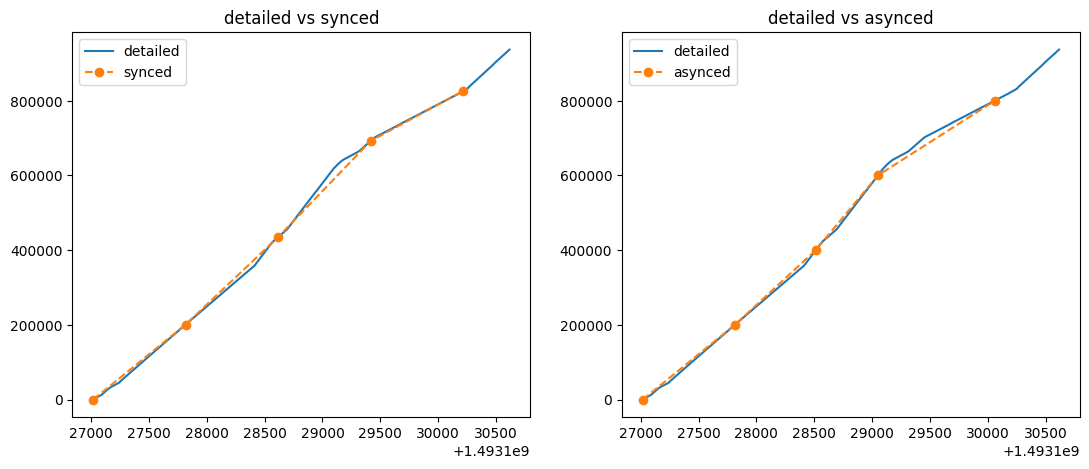

In [64]:
plot_sync_async_comparison(accumulated, sync_signals, async_signals)

In [51]:
sync_signals

2017-04-25 14:30:17+01:00         0.000000
2017-04-25 14:36:57+01:00     93719.537269
2017-04-25 14:43:37+01:00    201052.537269
2017-04-25 14:50:17+01:00    307024.246676
2017-04-25 14:56:57+01:00    435219.419270
2017-04-25 15:03:37+01:00    586582.403620
2017-04-25 15:10:17+01:00    692571.752992
2017-04-25 15:16:57+01:00    760978.310535
2017-04-25 15:23:37+01:00    825933.649085
2017-04-25 15:30:17+01:00    936987.420787
dtype: float64

In [65]:
def plot_power_and_consumption(data: pd.Series, period: slice = slice(None)) -> None:
    int_dates = datetime_index_to_ints(data.index)
    accumulated = data.values[period].cumsum()
    fig, axs = plt.subplots(1, 2, figsize=(13, 5))
    axs[0].plot(int_dates[period], data.values[period])
    axs[1].plot(int_dates[period], accumulated)

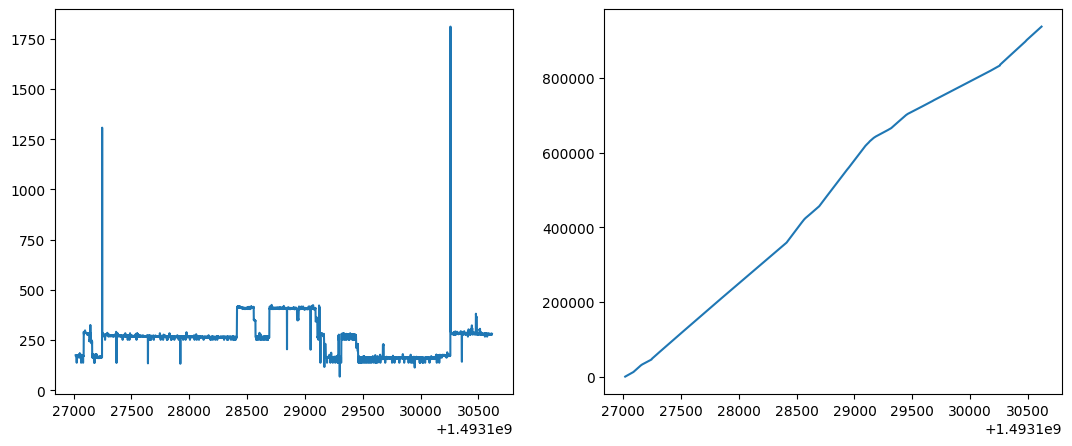

In [66]:
plot_power_and_consumption(interpolated)

In [72]:
from pandas import HDFStore
from utils.constants import DatasetType

data_file = HDFStore(DatasetType.IDEAL.processed_path(), mode='r')

In [73]:
data_file['building_39']

KeyError: 'No object named building_39 in the file'